In [5]:
import requests
import os
import json
from dotenv import load_dotenv
load_dotenv()

import sys
PARENT_DIR = os.path.dirname(os.getcwd())
src_path = os.path.join(PARENT_DIR, '')
print(src_path)
sys.path.append(src_path)


/Users/shotomorisaki/Engineering/X-Developper-Challenge-Search/backend/


In [54]:
from Twitter.recent_search import recent_search
from Twitter.process_queries import analyze
from Twitter.rank_tweets import rank_tweets, similarity_scorer

DATA_DIR = os.path.join(os.getcwd(), "data")

In [78]:
def get_results(query):
    res = analyze(query)
    description = res["description"]
    subqueries = res["subqueries"]
    data = {"queries": []}
    for item in subqueries:
        query =  item
        search_result = recent_search(query, 25)
        formatted_result = json.dumps(json.loads(search_result), indent=4)
        scoring = similarity_scorer(query, description)
        print(scoring)
        if(scoring > 0.85):
            print("Pass")
            data["queries"].append({"query": query, "results": formatted_result})
        else:
            pass
    sorted_tweets = rank_tweets(data["queries"], description)
    # print(sorted_tweets)
    
    return json.dumps([res, sorted_tweets], default=float)



In [79]:
result_container = get_results("NBA playoff")

0.7766277
0.87766176
Pass
0.9497717
Pass
0.8481928
0.8946886
Pass
0.8721441
Pass
0.8487812
0.93922204
Pass
0.7979536
0.916046
Pass


In [80]:
result_container_load = json.loads(result_container)
sorted_tweets = result_container_load[1]

/var/folders/_n/zkwnlxm959j1s3pt15cz_xmw0000gn/T/ipykernel_92206/3243249964.py:12: UserWarning: Glyph 128064 (\N{EYES}) missing from current font.
  plt.tight_layout()
/var/folders/_n/zkwnlxm959j1s3pt15cz_xmw0000gn/T/ipykernel_92206/3243249964.py:12: UserWarning: Glyph 127808 (\N{FOUR LEAF CLOVER}) missing from current font.
  plt.tight_layout()
/var/folders/_n/zkwnlxm959j1s3pt15cz_xmw0000gn/T/ipykernel_92206/3243249964.py:12: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  plt.tight_layout()
/var/folders/_n/zkwnlxm959j1s3pt15cz_xmw0000gn/T/ipykernel_92206/3243249964.py:12: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
/var/folders/_n/zkwnlxm959j1s3pt15cz_xmw0000gn/T/ipykernel_92206/3243249964.py:12: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  plt.tight_layout()
/var/folders/_n/zkwnlxm959j1s3pt15cz_xmw0000gn/T/ipykernel_92206/3243249964.py:12: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from

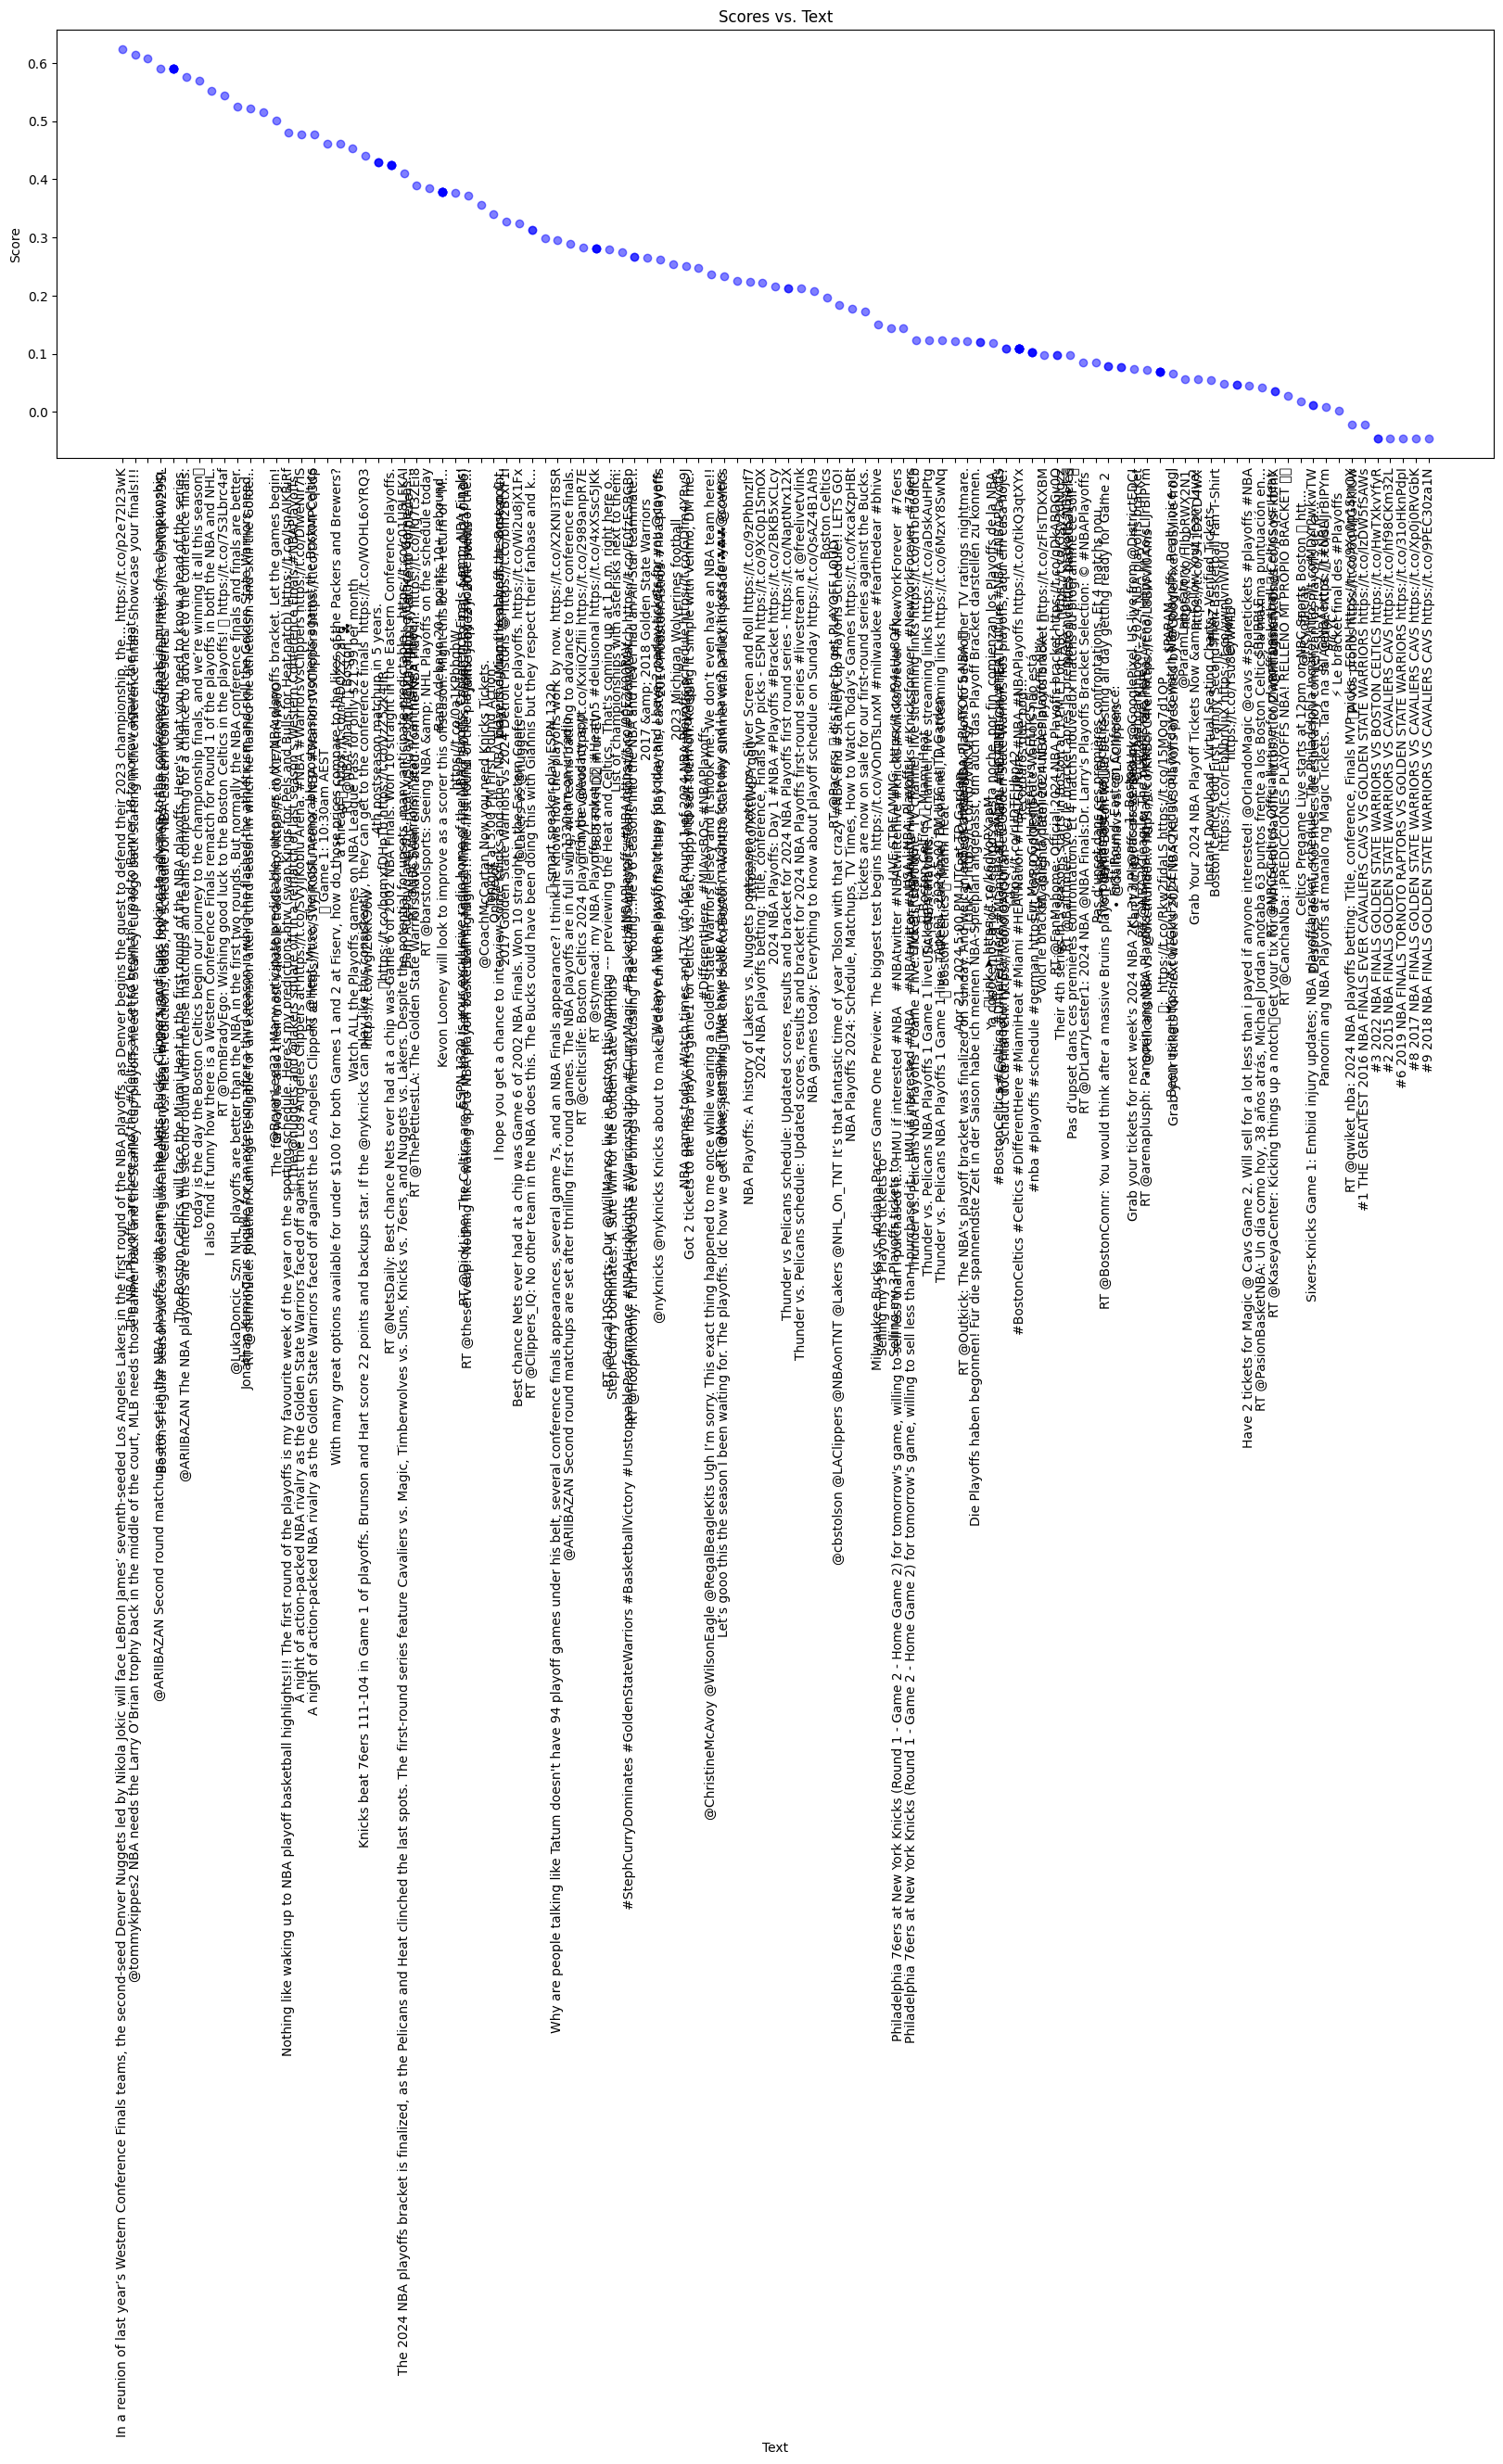

In [81]:
scores = [tweet["score"] for tweet in sorted_tweets]
text = [tweet["tweet"]["text"] for tweet in sorted_tweets]

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.scatter(text, scores, color='blue', alpha=0.5)
plt.xlabel('Text')
plt.ylabel('Score')
plt.title('Scores vs. Text')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()